In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gammainc, gamma
from functions_for_simulation import *
from scipy.stats import chi2

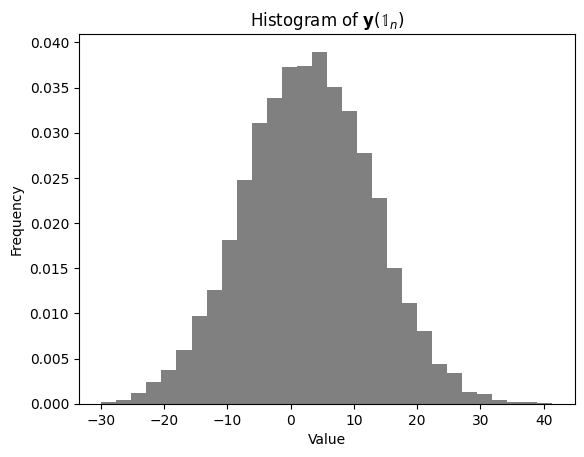

In [2]:
## initializing

rowNum, colNum = (5000, 5)
tau = 3
Xs = Xs_generator(rowNum, colNum)
# Xs = np.random.normal(0, 4, n)
Ws_1 = np.ones(rowNum) 
Ws_0 = np.zeros(rowNum)

Ys_1 = Ys_generator(Xs, Ws_1, tau=tau)
Ys_0 = Ys_generator(Xs, Ws_0, tau=tau)

# 绘制频数直方图，使用normed=True进行归一化，使其总面积等于1
plt.hist(Ys_1['y'], bins=30, density=True, alpha=1, color='grey')

# # 绘制卡方分布的PDF
# plt.plot(x, pdf, 'r-', lw=2, label=r'$\chi^2$ PDF, df=5')

# 添加图例和标签
# plt.legend(loc='best', frameon=False)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(r'Histogram of $\mathbf{y}(\mathbb{1}_n)$')

# 显示图形
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\m'
C:\Users\19514\AppData\Local\Temp\ipykernel_12052\1189667143.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.hist([data1, data2], bins=30, color=['#add8e6', '#ffa500'], alpha=0.7, label=['$\mathbf{y}(\mathbb{0}_n)$', '$\mathbf{y}(\mathbb{1}_n)$'],
C:\Users\19514\AppData\Local\Temp\ipykernel_12052\1189667143.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.hist([data1, data2], bins=30, color=['#add8e6', '#ffa500'], alpha=0.7, label=['$\mathbf{y}(\mathbb{0}_n)$', '$\math

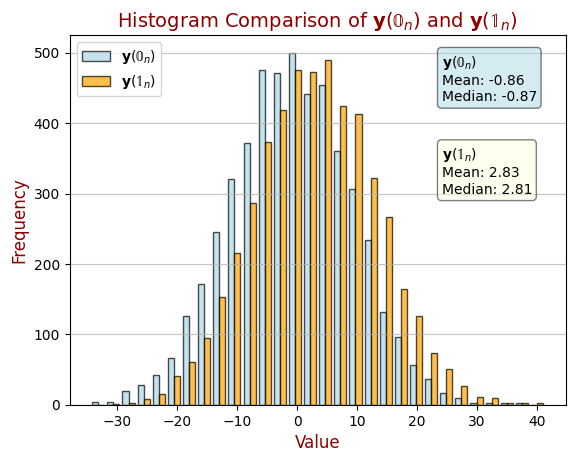

<Figure size 640x480 with 0 Axes>

In [5]:
# 使用numpy生成两组随机数据
# data1是从标准正态分布中抽取的1000个随机数，并加上1作为偏移量
data1 = Ys_0['y']
# data2是从标准正态分布中抽取的1000个随机数，并减去1作为偏移量
data2 = Ys_1['y']

# 使用plt.hist函数绘制直方图
# 参数说明：
#   - [data1, data2]：要绘制的数据，这里有两组数据
#   - bins=30：将数据分为30个直方柱
#   - color=['#add8e6', '#ffa500']：设置直方柱的颜色，分别为浅天蓝色和橙色
#   - alpha=0.7：设置直方柱的透明度
#   - label=['Data Group 1', 'Data Group 2']：为每个数据组设置标签
#   - edgecolor='black'：设置直方柱的边缘颜色为黑色
#   - linewidth=1：设置直方柱的边缘线宽
plt.hist([data1, data2], bins=30, color=['#add8e6', '#ffa500'], alpha=0.7, label=['$\mathbf{y}(\mathbb{0}_n)$', '$\mathbf{y}(\mathbb{1}_n)$'],
         edgecolor='black', linewidth=1)

# 添加网格线到图表上，仅对y轴添加网格线，并设置透明度为0.75
plt.grid(axis='y', alpha=0.75)

# 设置x轴的标签，标签内容为'Value'，字体大小为12，颜色为暗红色
plt.xlabel('Value', fontsize=12, color='darkred')
# 设置y轴的标签，标签内容为'Frequency'，字体大小为12，颜色为暗红色
plt.ylabel('Frequency', fontsize=12, color='darkred')

# 设置图表的标题，标题内容为'Histogram Comparison of Two Data Groups'，字体大小为14，颜色为暗红色
plt.title('Histogram Comparison of $\mathbf{y}(\mathbb{0}_n)$ and $\mathbf{y}(\mathbb{1}_n)$', fontsize=14, color='darkred')

# 计算两组数据的均值和中位数
mean1, median1 = np.mean(data1), np.median(data1)
mean2, median2 = np.mean(data2), np.median(data2)

# 在图表上添加文本，显示第一组数据的统计信息
# 参数说明：
#   - 0.75, 0.95：文本在图上的位置
#   - f'Data Group 1:\nMean: {mean1:.2f}\nMedian: {median1:.2f}'：要显示的文本内容，包括均值和中位数
#   - transform=plt.gca().transAxes：设置文本的位置参考坐标系为图的相对坐标系
#   - fontsize=10：设置文本字体大小
#   - verticalalignment='top'：设置文本垂直对齐方式为顶部对齐
#   - bbox：设置文本的边框样式和颜色
plt.text(0.75, 0.95, '$\mathbf{y}(\mathbb{0}_n)$'+f'\nMean: {mean1:.2f}\nMedian: {median1:.2f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# 在图表上添加文本，显示第二组数据的统计信息
# 参数与上面类似，只是位置和文本内容有所不同
plt.text(0.75, 0.70, '$\mathbf{y}(\mathbb{1}_n)$'+f'\nMean: {mean2:.2f}\nMedian: {median2:.2f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

# 调整图例的位置到图表的左上角
plt.legend(loc='upper left')

# 显示图表
plt.show()

# 将图表保存为名为'histogram_comparison.png'的图片文件，并设置分辨率为300dpi
plt.savefig('histogram_comparison.png', dpi=300)
